In [1]:
# Librerías
import pandas as pd


#### Selección de dataset: `IMDb Top 10000 Movies Dataset`



Este dataset consta de una colección meticulosa de 10 mil largometrajes recopilados de IMDb, una de las fuentes de información cinematográfica más populares y autorizadas. Las películas incluidas en este conjunto de datos están ordenadas según sus calificaciones de IMDb en orden descendente. El conjunto de datos cubre una amplia gama de géneros, directores y estrellas, y proporciona una descripción general completa de películas de gran prestigio en varias categorías. El proceso de extracción se realizó el 17 de junio de 2023.

Link Kaggle: [IMDb Top 10000 Movies Dataset](https://www.kaggle.com/datasets/moazeldsokyx/imdb-top-10000-movies-dataset)

<div>
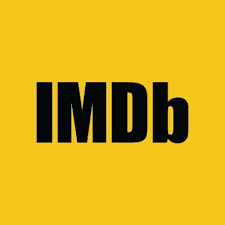
</div>



## Inspección de datos 

#### A continuación se describen las columnas del dataset, donde se menciona qué representa y el tipo de dato:

- `ID` (integer): Identificador único para cada película en el conjunto de datos.
- `Movie Name` (string): El título de la película.
- `Rating` (float): La calificación de IMDb para la película.
- `Runtime` (string): La duración de la película en minutos.
- `Genre` (string): El género al que pertenece la película.
- `Metascore` (float): La calificación de Metascore para la película (si está disponible).
- `Plot` (string): Un breve resumen o descripción de la trama de la película..
- `Directors` (string): El director o directores de la película.
- `Stars` (string):  El elenco principal o los actores que aparecen en la película.
- `Votes` (integer): La cantidad de votos/calificaciones que recibió la película.
- `Gross` (integer): Los ingresos brutos generados por la película (si está disponible).
- `Link` (string): El enlace de IMDb para acceder a los detalles completos e información adicional sobre la película.

Hemos encontrado que en el campo `Metascore` tiene 2.007 nulos, equivalentes al 20% de universo del dataset, sin embargo es pausible esta evalución tenga datos nulos, ya que se calcula a partir de las reseñas de películas hechas por un gran grupo de críticos más respetados en esta industria. Entonces pueden existir peliculas que no tengas esta criticas a gran escala y que sigan siendo populares en la audiencia.

In [5]:
# Se guarda en una varible el dataset de análisis
dataset = pd.read_csv('../data/Top_10000_Movies_IMDb.csv')

dataset

,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/
2,3,Ramayana: The Legend of Prince Rama,9.2,135 min,"Animation, Action, Adventure",NaN,An anime adaptation of the Hindu epic the Rama...,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108,https://www.imdb.com/title/tt0259534/
3,4,The Chaos Class,9.2,87 min,"Comedy, Drama",NaN,"Lazy, uneducated students share a very close b...","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785,https://www.imdb.com/title/tt0252487/
4,5,Daman,9.1,121 min,"Adventure, Drama",NaN,"The film is set in 2015. Sid, is a young docto...","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303,https://www.imdb.com/title/tt17592606/
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,Yogi Bear,4.6,80 min,"Animation, Adventure, Comedy",35.0,A documentary filmmaker travels to Jellystone ...,"['Eric Brevig', 'Dan Aykroyd', 'Justin Timberl...","['Dan Aykroyd', 'Justin Timberlake', 'Anna Far...",22762,100246011,https://www.imdb.com/title/tt1302067/
9995,9996,Troll,4.6,82 min,"Comedy, Fantasy, Horror",30.0,A wicked troll king in search of a mystical ri...,"['John Carl Buechler', 'Michael Moriarty', 'Sh...","['Michael Moriarty', 'Shelley Hack', 'Noah Hat...",10948,5450815,https://www.imdb.com/title/tt0092115/
9996,9997,Paranormal Activity 4,4.6,88 min,"Horror, Mystery",40.0,It has been five years since the disappearance...,"['Henry Joost', 'Ariel Schulman', 'Stephen Dun...","['Ariel Schulman', 'Stephen Dunham', 'Katie Fe...",68430,53921300,https://www.imdb.com/title/tt2109184/
9997,9998,Dark Crimes,4.6,92 min,"Crime, Drama, Mystery",24.0,A murder investigation of a slain businessman ...,"['Alexandros Avranas', 'Jim Carrey', 'Marton C...","['Jim Carrey', 'Marton Csokas', 'Charlotte Gai...",19098,19098,https://www.imdb.com/title/tt1901024/


In [6]:
# Identicar los tipos de datos de cada columna del dataset

dataset.dtypes

ID              int64
Movie Name     object
Rating        float64
Runtime        object
Genre          object
Metascore     float64
Plot           object
Directors      object
Stars          object
Votes           int64
Gross           int64
Link           object
dtype: object

In [7]:
# Revisión de nulos
print(dataset.isnull().sum())


ID               0
Movie Name       0
Rating           0
Runtime          0
Genre            0
Metascore     2007
Plot             0
Directors        0
Stars            0
Votes            0
Gross            0
Link             0
dtype: int64


In [10]:
# Revisión de duplicados de cada columna de un dataset

def contar_duplicados(dataset):
    resumen_duplicados = {}
    for column in dataset.columns:
        contar_duplicados = dataset[column].duplicated(keep=False).sum()  # Count all duplicates
        resumen_duplicados[column] = contar_duplicados
    return resumen_duplicados

# Generar el resumen
resumen_duplicados = contar_duplicados(dataset)

# Mostrar resultado
resumen_duplicados


{'ID': 0,
 'Movie Name': 703,
 'Rating': 9997,
 'Runtime': 9968,
 'Genre': 9883,
 'Metascore': 9997,
 'Plot': 8,
 'Directors': 56,
 'Stars': 85,
 'Votes': 1405,
 'Gross': 532,
 'Link': 0}